In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

#定義LeNet模型

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#呼叫模型

In [3]:
model = LeNet()

#定義損失函數和優化器

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#加載MNIST數據

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50263081.77it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1765183.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13479456.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7019354.74it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#可視化訓練

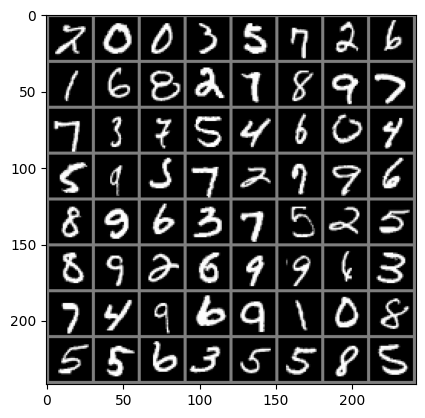

In [9]:
# 可視化一些訓練圖像
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 獲取一些隨機的訓練圖像
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 顯示圖像
imshow(torchvision.utils.make_grid(images))
# 打印標籤
print(' '.join('%5s' % labels[j].item() for j in range(8)))


#訓練模型

Epoch 1, Loss: 0.01252723920594878, Accuracy: 99.59166666666667%
Epoch 2, Loss: 0.010058170220539307, Accuracy: 99.68833333333333%
Epoch 3, Loss: 0.008385977632182353, Accuracy: 99.725%
Epoch 4, Loss: 0.007497901069490366, Accuracy: 99.77%
Epoch 5, Loss: 0.008239939552873908, Accuracy: 99.72166666666666%
Epoch 6, Loss: 0.007588689475249645, Accuracy: 99.74333333333334%
Epoch 7, Loss: 0.006633627698708943, Accuracy: 99.77833333333334%
Epoch 8, Loss: 0.004313826043550659, Accuracy: 99.87166666666667%
Epoch 9, Loss: 0.004132648335285603, Accuracy: 99.86333333333333%
Epoch 10, Loss: 0.00501424588596097, Accuracy: 99.84166666666667%


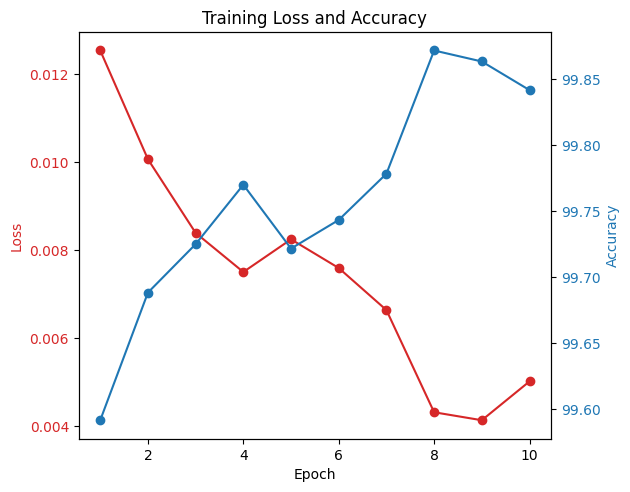

In [11]:
losses = []
accuracies = []
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # 計算準確率
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

# 可視化損失和準確率
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, 11), losses, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1, 11), accuracies, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training Loss and Accuracy')
plt.show()

#評估模型

Accuracy: 99.02%


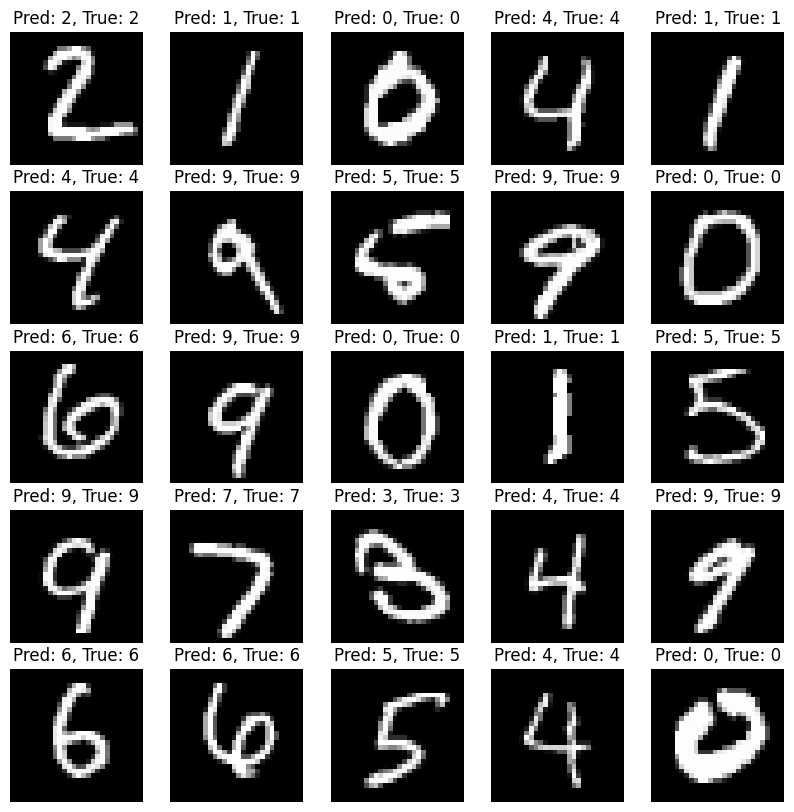

In [12]:
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Accuracy: {100 * correct / total}%')

# 可視化一些預測結果
fig = plt.figure(figsize=(10, 10))
for i in range(1, 26):
    ax = fig.add_subplot(5, 5, i)
    ax.imshow(testset.data[i], cmap='gray')
    ax.title.set_text(f'Pred: {all_preds[i]}, True: {all_labels[i]}')
    ax.axis('off')
plt.show()